## Q. 'load_breast_cancer()' dateset 불러와서 다음 사항 수행

- 데이터 세트의 구성 요소 파악하고 features 개수 산출
- cancer.data를 dataframe으로 전환
- 정규화
- 학습용 데이터와 검증용 데이터를 7:3으로 구분
- Decision Tree, Logistic Regression, Random Forest 기법으로 분류 예측 각각 수행

feature names & count of features

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()
print (type(cancer))
print (cancer.feature_names)
print (len(cancer.feature_names))

<class 'sklearn.utils.Bunch'>
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [91]:
display (cancer.target)
print (cancer.target_names)
print (type(cancer.target))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

['malignant' 'benign']
<class 'numpy.ndarray'>


In [92]:
print (cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

datatype casting

In [93]:
print (cancer.data)
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
display (df)

dft = pd.DataFrame(cancer.target)
display (dft)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


정규화

- StandardScaler를 통한 정규화 (표준정규분포)

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

print (data_scaled, type(data_scaled))

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]] <class 'numpy.ndarray'>


- MinmaxScaler로 정규화 (개별값 / 최대값)

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(cancer.data)

print (data_scaled, type(data_scaled))

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]] <class 'numpy.ndarray'>


In [0]:
dfn = df / df.max()

In [97]:
print (df.max())
dfn = df / df.max()
display ( dfn )

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.16340
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09744
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.639986,0.264257,0.651459,0.400240,0.724602,0.803706,0.703140,0.731113,0.795724,0.807779,0.381135,0.185322,0.390764,0.282921,0.205557,0.362186,0.135682,0.300625,0.380367,0.207540,0.704218,0.349818,0.734873,0.474612,0.728661,0.629112,0.568610,0.912027,0.693130,0.573012
1,0.731768,0.452393,0.705040,0.530188,0.518605,0.227678,0.203608,0.348757,0.596053,0.581589,0.189175,0.150235,0.154595,0.136629,0.167845,0.096603,0.046970,0.253836,0.175934,0.118365,0.693396,0.472547,0.632166,0.459803,0.556155,0.176371,0.192971,0.639175,0.414281,0.429012
2,0.700462,0.540988,0.689655,0.481008,0.670747,0.462942,0.462512,0.635686,0.680592,0.615661,0.259520,0.161085,0.208599,0.173423,0.197559,0.295864,0.096768,0.389847,0.284991,0.153184,0.653996,0.515341,0.607086,0.401740,0.648697,0.401229,0.359744,0.835052,0.544290,0.422072
3,0.406261,0.518839,0.411565,0.154378,0.872093,0.821946,0.565604,0.522863,0.854276,1.000000,0.172503,0.236643,0.156733,0.050221,0.292644,0.550812,0.142955,0.353665,0.755288,0.308579,0.413707,0.534921,0.393591,0.133451,0.942498,0.818809,0.548642,0.884880,1.000000,0.833735
4,0.721807,0.365071,0.716711,0.518593,0.613831,0.384482,0.463918,0.518390,0.595066,0.603756,0.263557,0.159939,0.247407,0.174179,0.369097,0.181758,0.143636,0.357075,0.222419,0.171414,0.625416,0.336496,0.605892,0.370240,0.617251,0.193762,0.319489,0.558419,0.356131,0.370024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.766987,0.570010,0.753316,0.591363,0.679315,0.335553,0.571462,0.690358,0.567763,0.577073,0.409328,0.257114,0.349090,0.292696,0.330871,0.213516,0.131263,0.464861,0.141102,0.142058,0.706160,0.532903,0.661226,0.476493,0.633423,0.199716,0.328035,0.761512,0.310334,0.342892
565,0.716115,0.719196,0.696021,0.504198,0.598531,0.299363,0.337395,0.486630,0.576316,0.567837,0.266446,0.504197,0.236715,0.182663,0.185320,0.178951,0.099747,0.317863,0.240405,0.083713,0.657325,0.772103,0.617038,0.406911,0.523810,0.181664,0.256789,0.559450,0.387466,0.319855
566,0.590537,0.714868,0.574536,0.343103,0.517442,0.296178,0.216753,0.263519,0.523026,0.579639,0.158858,0.220061,0.155823,0.089543,0.189624,0.275554,0.119444,0.294942,0.166941,0.130429,0.526637,0.688736,0.504379,0.264222,0.511680,0.292439,0.271805,0.487285,0.334137,0.376867
567,0.732835,0.746690,0.743236,0.505798,0.720930,0.801969,0.823336,0.755467,0.788487,0.720033,0.252698,0.326510,0.262602,0.159019,0.209509,0.454801,0.179722,0.315211,0.294364,0.207272,0.714206,0.795721,0.734873,0.428068,0.741240,0.820510,0.749760,0.910653,0.615697,0.597590


train data : test data = 7 :3

In [98]:
from sklearn.model_selection import train_test_split

x = dfn
y = dft

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print (f'{len(x_train)}\t{len(x_test)}\t{len(y_train)}\t{len(y_test)}\t')

398	171	398	171	


[1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
0.9298245614035088


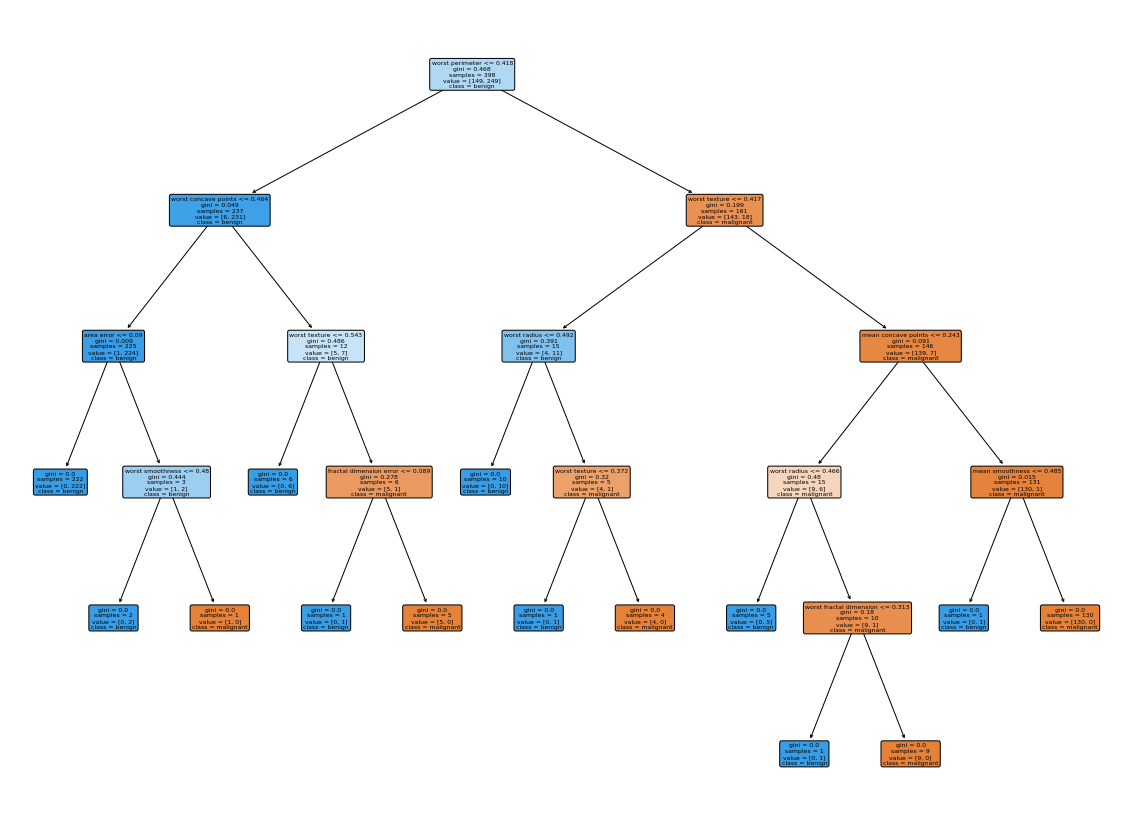

In [99]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(x_train, y_train)
dtcpd = dtc.predict(x_test)
print (dtcpd)
print (accuracy_score(y_test, dtcpd))

plt.figure (figsize = (20,15))
tree.plot_tree(dtc, filled=True, feature_names=cancer.feature_names, class_names=cancer.target_names, rounded=True, )

plt.show() ; plt.close()

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=20)
rf.fit(x_train, y_train)
rfpd = rf.predict(x_test)
print (accuracy_score(y_test, rfpd))



0.9532163742690059


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [101]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lrpd = lr.predict(x_test)
print (accuracy_score(y_test, lrpd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9649122807017544


# 교차검증

- KFold : K개의 data fold 만들어서 k번만큼 학습과 검증을 반복 수행
    - fold set 설정
    - for loop 반복 데이터 index 추출
    - 반복 학습 수행 및 예측성능 반환
- Stratified KFold : 불균형한 분포도를 가진 label data 집합을 위한 방식
    - KFold의 경우 label data 집합이 원본 데이터 집합의 label 분포를 제대로 분배 못하여 문제가 발생하기 때문에
- cross_val_scores : KFold의 일련의 과정을 한꺼번에 수행해주는 API
    - 분류 모델의 경우 cvs는 내부적으로 Stratified KFold 방식으로 label 값 분포에 따라 학습 - 테스트 set 분할

In [102]:
df = pd.read_pickle('t3_df.pkl')
display (df.head())
xdf = df.drop('survived',axis=1)
ydf = df.survived

,pclass,sex,age,fare,survived
0,1,0,29.00,211.3375,1
1,1,1,0.92,151.5500,1
2,1,0,2.00,151.5500,0
3,1,1,30.00,151.5500,0
4,1,0,25.00,151.5500,0


In [0]:
x_train, x_test, y_train, y_test = train_test_split (xdf, ydf, test_size=0.2, random_state=1)

dtc = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
lr = LogisticRegression(random_state=1)

## KFold 방식 기본 구조

In [0]:
from sklearn.model_selection import KFold

In [0]:
def exec_kfold(clf, folds=5) :
    kfold = KFold(n_splits=folds)
    scores = []

    for iter_count, (train_index, test_index) in enumerate(kfold.split(xdf)) :
        X_train, X_test = xdf.values[train_index], xdf.values[test_index]
        y_train, y_test = ydf.values[train_index], ydf.values[test_index]

        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc = accuracy_score(y_test, pred)
        scores.append(acc)
        print (f'교차 검증 {iter_count+1} 정확도 : {round(acc, 4)}')
    mean_score = np.mean(scores)
    print (f'평균 정확도 : {round(mean_score, 4)}')

In [106]:
exec_kfold(dtc)

교차 검증 1 정확도 : 0.7366
교차 검증 2 정확도 : 0.7977
교차 검증 3 정확도 : 0.7405
교차 검증 4 정확도 : 0.7137
교차 검증 5 정확도 : 0.728
평균 정확도 : 0.7433


In [107]:
exec_kfold(rf)

교차 검증 1 정확도 : 0.7099
교차 검증 2 정확도 : 0.8321
교차 검증 3 정확도 : 0.7519
교차 검증 4 정확도 : 0.7443
교차 검증 5 정확도 : 0.7586
평균 정확도 : 0.7594


In [108]:
exec_kfold(lr)

교차 검증 1 정확도 : 0.8053
교차 검증 2 정확도 : 0.8511
교차 검증 3 정확도 : 0.7863
교차 검증 4 정확도 : 0.7328
교차 검증 5 정확도 : 0.7625
평균 정확도 : 0.7876


## `cross_val_score` : KFold 과정을 한꺼번에 수행해주는 API

- KFold 방식의 왜곡을 보정할 수 있음

In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtc, xdf, ydf, cv=5)
for iter_count, acc in enumerate(scores) :
    print (f'교차 검증 {iter_count+1} 정확도 : {round(acc, 4)}')
print (f'평균 정확도 : {round(np.mean(scores), 4)}')

교차 검증 1 정확도 : 0.5038
교차 검증 2 정확도 : 0.7557
교차 검증 3 정확도 : 0.687
교차 검증 4 정확도 : 0.6756
교차 검증 5 정확도 : 0.6437
평균 정확도 : 0.6532


In [110]:
scores = cross_val_score(dtc, xdf, ydf, cv=10)
for iter_count, acc in enumerate(scores) :
    print (f'교차 검증 {iter_count+1} 정확도 : {round(acc, 4)}')
print (f'평균 정확도 : {round(np.mean(scores), 4)}')

교차 검증 1 정확도 : 0.7099
교차 검증 2 정확도 : 0.7634
교차 검증 3 정확도 : 0.8168
교차 검증 4 정확도 : 0.7328
교차 검증 5 정확도 : 0.7557
교차 검증 6 정확도 : 0.7786
교차 검증 7 정확도 : 0.6565
교차 검증 8 정확도 : 0.6412
교차 검증 9 정확도 : 0.626
교차 검증 10 정확도 : 0.7077
평균 정확도 : 0.7189


## ***`sklearn.model_selection.GridSearchCV` : 교차 검증을 기반으로 hyper parameter의 최적값을 찾게 해줌***


In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

paras = {
    'max_depth' : [2,3,5,10],
    # 'max_depth' : range(11),
    'min_samples_split' : [2,3,5],
    'min_samples_leaf' : [1,5,8],
}

grid = GridSearchCV(estimator=dtc, param_grid=paras, scoring='accuracy', cv=5, refit=True)
grid.fit (x_train, y_train)
print (grid)
print (f'최적 hyper parameter : {grid.best_params_}\n최고 정확도 : {grid.best_score_}')

best_dclf = grid.best_estimator_
print (best_dclf)
best_pred = best_dclf.predict(x_test)
acc = accuracy_score(y_test, best_pred)
print (f'예측 정확도 : {acc}')

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                  

In [113]:
rfparam = {
    # rf에서 결정 트리 개수 지정, default=10, 많이 설정할 수록 좋은 성능 보이지만 수행시간이 오래걸림
    'n_estimators' : [50,100,200],

    # DT의 max_features와 동일, 전체피처개수의 sqrt만큼 참조
    'max_depth' : [2,3,5],
    'min_samples_leaf' : [1,5,8],
}
grid = GridSearchCV(estimator=rf, param_grid=rfparam,scoring='accuracy', cv=5, refit=True)
grid.fit (x_train, y_train)

print (f'최적 hyper parameter : {grid.best_params_}\n최고 정확도 : {grid.best_score_}')

best_dclf = grid.best_estimator_
print (best_dclf)
best_pred = best_dclf.predict(x_test)
acc = accuracy_score(y_test, best_pred)
print (f'예측 정확도 : {acc}')

최적 hyper parameter : {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 200}
최고 정확도 : 0.8041968557758032
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
예측 정확도 : 0.8015267175572519


In [118]:
import warnings
warnings.filterwarnings('ignore')

lrparam = {
    # L1 == 불필요한 회귀계수를 급격히 감소시켜, 0으로 만들고 제거
    # L2 == 회귀 계수의 크기를 감소시킴
    'penalty' : ['l2','l1', 'none'],
    
    # 규제 강도를 조절하는 alpha 값의 역수, 값이 작을수록 강도가 큼
    'C' : [0.01,0.1,1,1.5,10],
}
grid = GridSearchCV(estimator=lr, param_grid=lrparam,scoring='accuracy', cv=5, refit=True)
grid.fit (x_train, y_train)

print (f'최적 hyper parameter : {grid.best_params_}\n최고 정확도 : {grid.best_score_}')

best_lrclf = grid.best_estimator_
print (best_lrclf)
best_pred = best_lrclf.predict(x_test)
acc = accuracy_score(y_test, best_pred)
print (f'예측 정확도 : {acc}')

최적 hyper parameter : {'C': 0.01, 'penalty': 'none'}
최고 정확도 : 0.7850763271815904
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
예측 정확도 : 0.8015267175572519
